In [2]:
# Fetch the data
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


fetch_housing_data()


# Load the data with pandas.

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


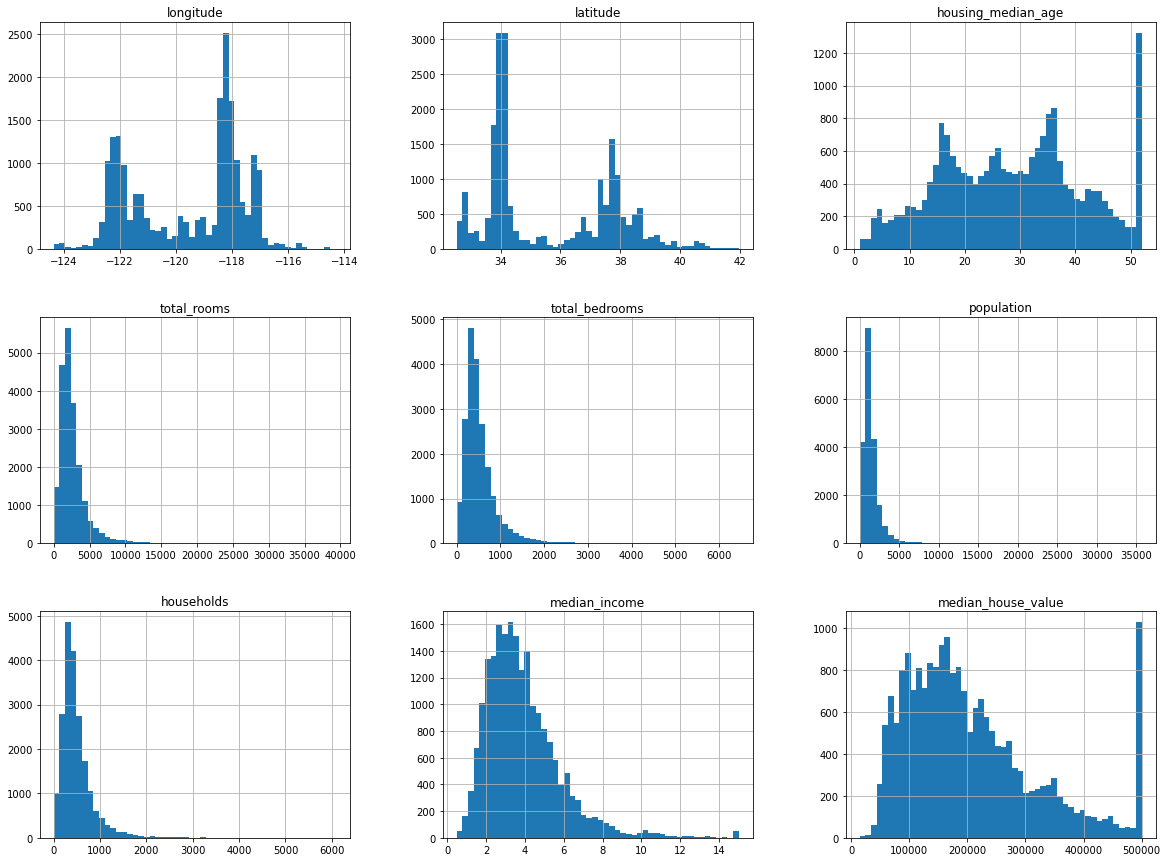

In [5]:
#MATPLOTLIB

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Create the training data!!!

In [6]:
# Do a test set Randomly

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set = split_train_test(housing, 0.2)

print(len(train_set), "train + ", len(test_set), "test")


16512 train +  4128 test


# The above isnt perfect.
* If you run it again it will generate a different test set -> over time the algo will see all the data (which is bad).
* If you save or do a random seed it will break when you fetch an updated data set.
* one solution is to compute a hash of each instance.

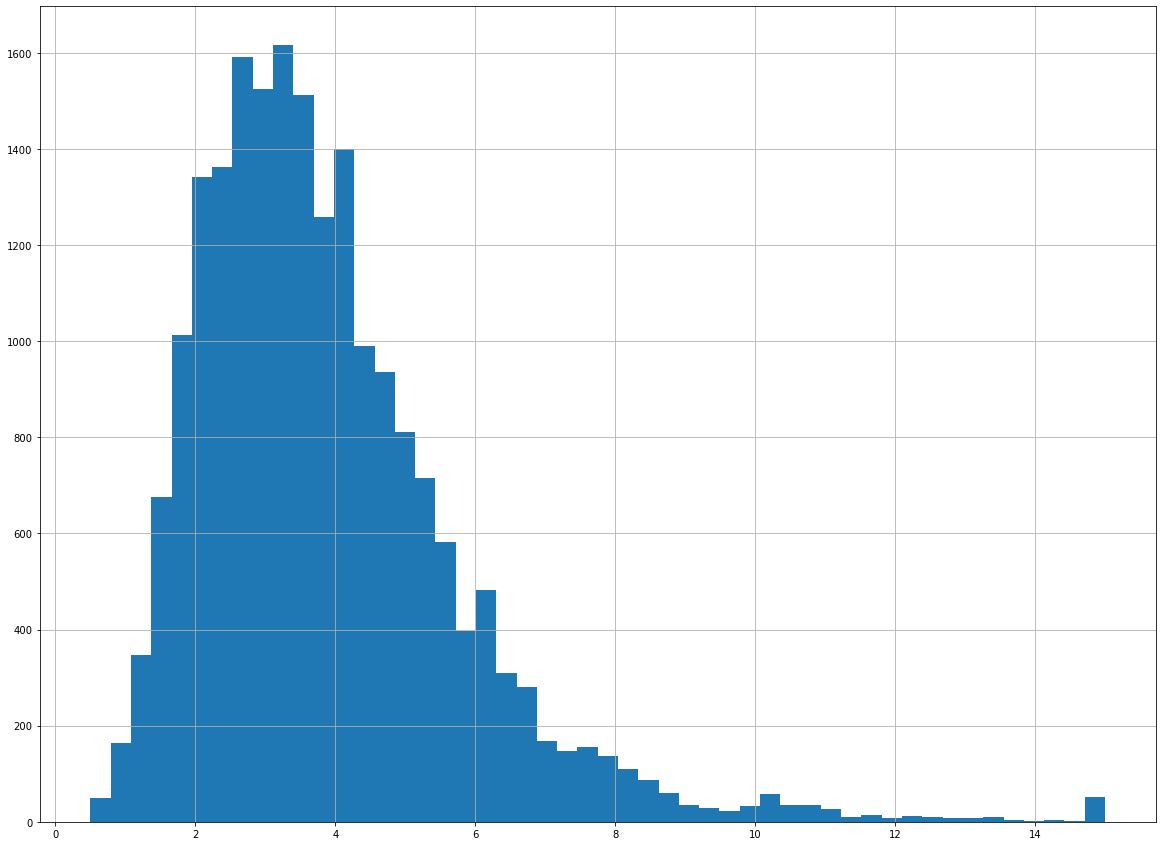

In [7]:

# Display the median income:
housing["median_income"].hist(bins=50, figsize=(20,15))

# Create a new income category attribute by dividing the median income by 1.5.
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

# Merge all the categories greater than 5:
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)





# Explanation:
So basically the client said that the median income is an important attribute to predict median housing prices.
So we needed to ensure that the test set represents the various categories of incomes in the whole data set.
    - since the income is a continuous numerical attribute, we need to first create a new category called income.
So we divide the median income attribute by 1.5 and then round up the value regardless to assign each row with a new category in income.
Since the data has a long tail (goes far beyond the where the main concentration of data is which is in between 2 (20,000) and 5 (50,000)).
    - if the result of the calculation above is greater than 5, it will be put into the 5th category anyway and therefore represents high incomes.
        - This is because each strum needs to have a sufficient amount of data in as this mey skew the strantums importance (i think).


In [8]:
# Create a test and train set via stratified sampling.

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)



3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

# Above we just created a train and test set based on the income category.

# Now we need to remove the income category attribute so the data is back to its original form.

In [9]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# I assume this just loops trough the sets and removes the income_cat attribute from each row.


# Discover and Visualise the Data to Gain insights!!!

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

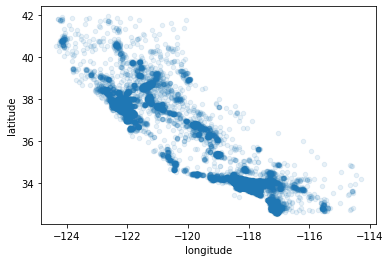

In [10]:
# Create a copy of the training set -> this is so we can play with it without harming the training set:
housing_play = strat_train_set.copy()

# Display the data in a scatter graph and change the alpha to see which areas are more concentrated.
housing_play.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


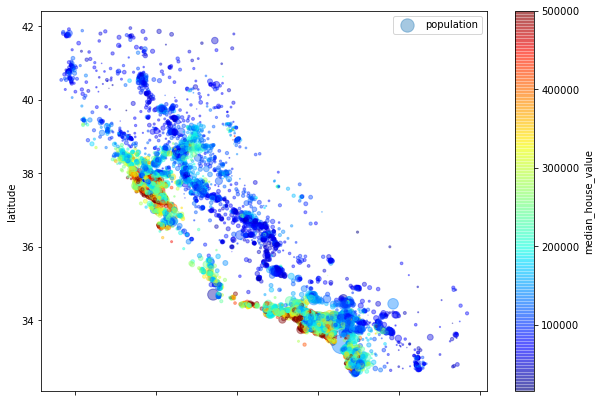

In [11]:
# Create a new visualisation including the districts population and price represented by radius and colour.
housing_play.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing_play["population"]/100, label="population", figsize=(10, 7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [12]:
# Calculate the standard correlation coefficient between every pair of attributes using the corr() method.
correlation_matrix = housing_play.corr()
# median_house_value
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

# Above is a graph to show th population and housing price in each location shown by the long and lat
# Next is a correlation matrix which provides a way to easily discover which attributes most correlate to the chosed attribute.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

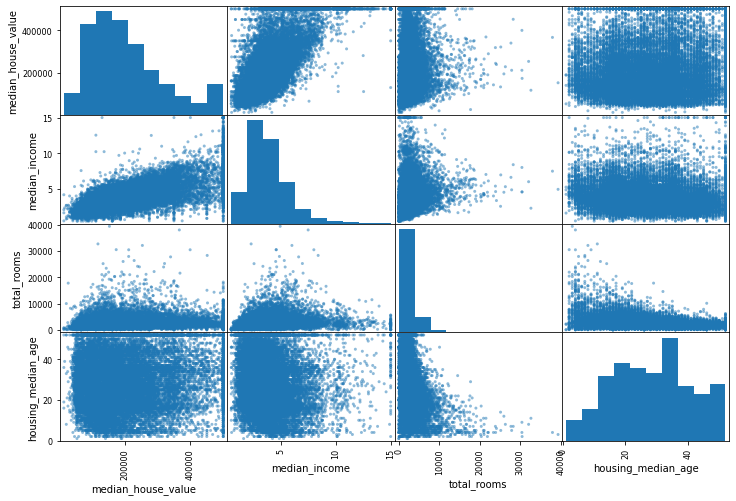

In [13]:
# Another way to check is to use pandas scatter_matrix function which plots every numerical attribute against each other.
# All 11 attributes is too much so we pick a few that seem most important.

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

# On page 58 58 58 58 5t8 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58